# Data Visualization Project on Bundesliga Current Players

## 1. Read Essential Libraries

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## 2. Scraping data using the method we used on Premier League

In [2]:
def Team(sequence):
    #Things we need (Name, Value, Age, Position, Number, Team)
    Player_List = []
    Value_List = []
    Age_List = []
    Position_List = []
    Number_List = []
    Team_List = []
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    for i in range(len(sequence)):
        e = sequence[i]
        # Scraping
        pageTree = requests.get(e, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Players = pageSoup.find_all("td", {"class": "hide"})
        Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Age = pageSoup.find_all("td", {"class": "zentriert"})
        Position = pageSoup.find_all("tr")
        Number = pageSoup.find_all("td")
        a = 0
        b = 0 
        c = 1
        d = 4
        e = 3
        while a < len(Players):
            Player_List.append(Players[a].text)
            a = a + 1
            Team_List.append(sequence[i][32:(len(sequence[i])-22)])
        while b < len(Values):
            Value_List.append(Values[b].text)
            b = b + 1
        while c < (1+len(Players)*3):
            Age_List.append(Age[c].text)
            c = c + 3
        while d < (4+len(Players)*3):
            Position_List.append(Position[d].text)
            d = d + 3 
        while e < (3+len(Players)*9):
            Number_List.append(Number[e].text)
            e = e + 9
    # Return these results to dataframe
    Player = pd.DataFrame({'Player':Player_List})
    Value = pd.DataFrame({'Value':Value_List})
    Age = pd.DataFrame({'Age':Age_List})    
    Position = pd.DataFrame({'Position':Position_List})  
    Number = pd.DataFrame({'Number':Number_List})  
    Club = pd.DataFrame({'Club':Team_List})
    return Player, Value, Age, Position, Number, Club

In [5]:
# Scrapping 18 Clubs data
Player,Value,Age, Position, Number, Club = Team(['https://www.transfermarkt.co.uk/fc-bayern-munchen/startseite/verein/27',
      'https://www.transfermarkt.co.uk/borussia-dortmund/startseite/verein/16',
      'https://www.transfermarkt.co.uk/rasenballsport-leipzig/startseite/verein/23826',
      'https://www.transfermarkt.co.uk/bayer-04-leverkusen/startseite/verein/15',
      'https://www.transfermarkt.co.uk/borussia-monchengladbach/startseite/verein/18',
      'https://www.transfermarkt.co.uk/vfl-wolfsburg/startseite/verein/82',
      'https://www.transfermarkt.co.uk/eintracht-frankfurt/startseite/verein/24',
      'https://www.transfermarkt.co.uk/sv-werder-bremen/startseite/verein/86',
      'https://www.transfermarkt.co.uk/tsg-1899-hoffenheim/startseite/verein/533',
      'https://www.transfermarkt.co.uk/fortuna-dusseldorf/startseite/verein/38',
      'https://www.transfermarkt.co.uk/hertha-bsc/startseite/verein/44',
      'https://www.transfermarkt.co.uk/1-fsv-mainz-05/startseite/verein/39',
      'https://www.transfermarkt.co.uk/sc-freiburg/startseite/verein/60',
      'https://www.transfermarkt.co.uk/fc-schalke-04/startseite/verein/33',
      'https://www.transfermarkt.co.uk/fc-augsburg/startseite/verein/167',
      'https://www.transfermarkt.co.uk/1-fc-koln/startseite/verein/3',
      'https://www.transfermarkt.co.uk/sc-paderborn-07/startseite/verein/127',
      'https://www.transfermarkt.co.uk/1-fc-union-berlin/startseite/verein/89'])

In [6]:
#Join together
Bundesliga =  Player.join(Value).join(Age).join(Position).join(Number).join(Club)

In [7]:
# Transform player value to float for further analysis
Bundesliga[['Value']] = pd.concat([Value[col].str.split()
                       .str[0]
                       .str.replace('£','')
                       .str.replace('k','000')
                       .str.replace('m','').astype(float) for col in Value], axis=1)

In [8]:
# Transform value to the same standard (Million £)
Filter = Bundesliga[Bundesliga.Value>200].copy(deep=False)
Filter['Value'] = Filter['Value'].div(1000000).round(2)
Bundesliga[Bundesliga.Value>200] = Filter

In [9]:
# Transform player birth date and age to age (numeric)
Bundesliga = Bundesliga.sort_values('Value',ascending = False).reset_index(drop = 'True')
Age = Bundesliga['Age'].str[-3:-1]
Bundesliga['Age'] = Age.astype(int)

In [10]:
# Some names are spelled in a wrong way
Bundesliga['Club'].unique()

array(['borussia-dortmun', 'bayer-04-leverkuse', 'fc-bayern-munche',
       'rasenballsport-leipzig/s', 'borussia-monchengladbac',
       'tsg-1899-hoffenheim', 'eintracht-frankfur', 'sv-werder-breme',
       'fc-schalke-0', 'vfl-wolfsbur', '1-fsv-mainz-0', 'hertha-bs',
       'sc-freibur', 'fc-augsburg', 'fortuna-dusseldor', '1-fc-ko',
       'sc-paderborn-07', '1-fc-union-berli'], dtype=object)

In [11]:
# Replace them
Bundesliga.Club.replace(['borussia-dortmun','c','fc-bayern-munche','rasenballsport-leipzig/s','borussia-monchengladbac',
                      'eintracht-frankfur','sv-werder-breme','fc-schalke-0','vfl-wolfsbur','1-fsv-mainz-0','hertha-bs',
                      'sc-freibur','fortuna-dusseldor','1-fc-ko','1-fc-union-berli'],
                     ['borussia-dortmund','bayer-04-leverkusen','fc-bayern-munchen','rasenballsport-leipzig','borussia-monchengladbach',
                      'eintracht-frankfurt','sv-werder-bremen','fc-schalke-04','vfl-wolfsburg','1-fsv-mainz-05','hertha-bsc',
                      'sc-freiburg','fortuna-dusseldorf','1-fc-koln','1-fc-union-berlin'],inplace=True)

#### Scrap Nationality

In [12]:
def Citizenship(x):
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    Country = []
    i = 0
    while i < len(x.Player):
        player = x.Player[i]
        data = requests.get("https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={}&x=0&y=0".format(player),headers=headers) 
        soup = BeautifulSoup(data.text, "lxml")
        hrefs = soup.find_all("img", {"class" : "flaggenrahmen"},alt=True)
        Flag = hrefs[16]['alt']
        Country.append(Flag)
        i = i+1
    return Country

In [14]:
# However, when scraping nationalities, I encountered some problem. It turns out that this player cannot be searched. 
# So I delete him first and then add him later
Bundesliga = Bundesliga[Bundesliga.Player!='Jeremiah St. Juste'].reset_index(drop="True")

In [15]:
# Scraping nationality
Citizenship = Citizenship(Bundesliga)

In [16]:
# Join this column to Bundesliga dataset we already have
Bundesliga = Bundesliga.join(pd.DataFrame({'Citizenship':Citizenship}))

In [24]:
# The player that we deleted before
Jeremiah = pd.DataFrame({'Player':['Jeremiah St. Juste'],'Value':[8.10],'Age':[23],
                         'Position': ['Centre-Back'],'Number':[4],'Club':['1-fsv-mainz-05'],'Citizenship':['Netherlands']})
Jeremiah = Jeremiah[['Player','Value', 'Age','Position','Number','Club','Citizenship']]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Jeremiah St. Juste,8.1,23,Centre-Back,4,1-fsv-mainz-05,Netherlands


In [26]:
# add him in
Bundesliga = Bundesliga.append(Jeremiah)

### Final Data

In [29]:
Bundesliga = Bundesliga.sort_values('Value',ascending = False).reset_index(drop="True")

## 3. Data Visualization

#### 10 Most Expensive Players in Bundesliga

In [39]:
Bundesliga.loc[:9,]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Jadon Sancho,108.0,19,Right Winger,7,borussia-dortmund,England
1,Kai Havertz,81.0,20,Attacking Midfield,29,bayer-04-leverkuse,Germany
2,Serge Gnabry,72.0,24,Right Winger,22,fc-bayern-munchen,Germany
3,Joshua Kimmich,72.0,24,Right-Back,32,fc-bayern-munchen,Germany
4,Timo Werner,67.5,23,Centre-Forward,11,rasenballsport-leipzig,Germany
5,Robert Lewandowski,63.0,31,Centre-Forward,9,fc-bayern-munchen,Poland
6,Philippe Coutinho,63.0,27,Attacking Midfield,10,fc-bayern-munchen,Brazil
7,Lucas Hernández,63.0,23,Centre-Back,21,fc-bayern-munchen,France
8,David Alaba,58.5,27,Left-Back,27,fc-bayern-munchen,Austria
9,Thiago,54.0,28,Central Midfield,6,fc-bayern-munchen,Spain


#### 10 Most Expensive German Players in Bundesliga

In [67]:
Bundesliga[Bundesliga.Citizenship == 'Germany'].reset_index(drop = 'True').loc[:9]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Kai Havertz,81.0,20,Attacking Midfield,29,bayer-04-leverkuse,Germany
1,Serge Gnabry,72.0,24,Right Winger,22,fc-bayern-munchen,Germany
2,Joshua Kimmich,72.0,24,Right-Back,32,fc-bayern-munchen,Germany
3,Timo Werner,67.5,23,Centre-Forward,11,rasenballsport-leipzig,Germany
4,Niklas Süle,54.0,24,Centre-Back,4,fc-bayern-munchen,Germany
5,Leon Goretzka,45.0,24,Central Midfield,18,fc-bayern-munchen,Germany
6,Julian Brandt,45.0,23,Attacking Midfield,19,borussia-dortmund,Germany
7,Marco Reus,36.0,30,Attacking Midfield,11,borussia-dortmund,Germany
8,Jonathan Tah,33.3,23,Centre-Back,4,bayer-04-leverkuse,Germany
9,Lukas Klostermann,31.5,23,Right-Back,16,rasenballsport-leipzig,Germany


#### Descriptive Statistics of Age

In [45]:
Bundesliga.Age.describe()

count    532.000000
mean      25.195489
std        4.439098
min       17.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       41.000000
Name: Age, dtype: float64

#### The distribution of 534 Players Age

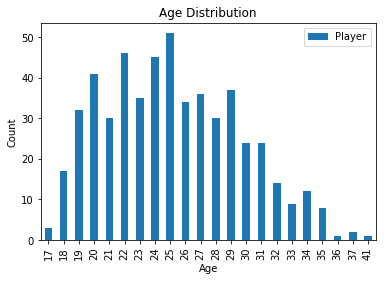

In [68]:
Bundesliga.groupby('Age')[['Player']].count().plot.bar()
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Average Age of 18 Clubs

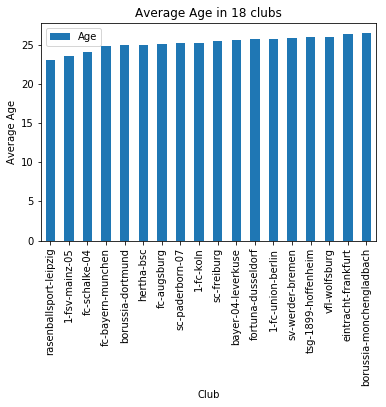

In [63]:
Bundesliga.groupby('Club')[['Age']].mean().sort_values('Age').plot.bar()
plt.ylabel('Average Age')
plt.title('Average Age in 18 clubs')
plt.show()

#### Total Players Value of 18 Clubs

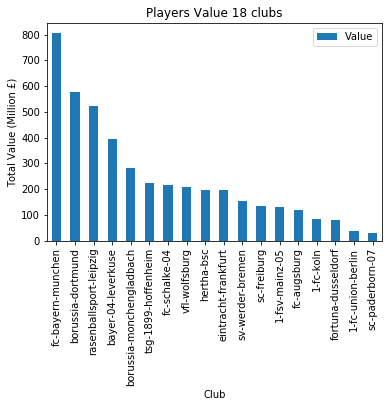

In [64]:
Bundesliga.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.bar()
plt.ylabel('Total Value (Million £)')
plt.title('Players Value 18 clubs')
plt.show()

#### Players Nationality

In [90]:
# Number of Countries who have players in Bundesliga
len(Bundesliga.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False).reset_index())

59

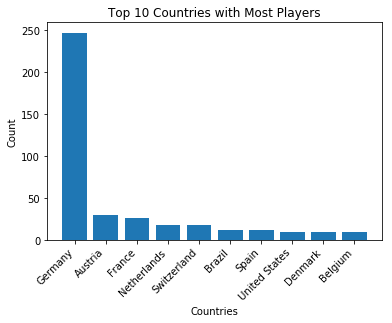

In [98]:
Top10country = Bundesliga.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False).reset_index().loc[:9]
plt.bar('Citizenship','Player',data=Top10country)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Players')
plt.show()
# Visualizing it on Tableau or Power BI is more convenient